In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = train.iloc[:, 1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled.shape

(1258, 1)

In [8]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
x_train.shape

(1198, 60, 1)

In [11]:
regressor = Sequential()

In [15]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1], 1))) 
regressor.add(Dropout(0.4)) 

regressor.add(LSTM(units=100,return_sequences=True)) 
regressor.add(Dropout(0.6)) 
regressor.add(LSTM(units=100,return_sequences=True)) 
regressor.add(Dropout(0.6)) 
regressor.add(LSTM(units=100)) 
regressor.add(Dropout(0.4)) 
regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error') 
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 121ms/step - loss: 0.0418
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0096
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0071
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0064
Epoch 5/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0079
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0058
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0048
Epoch 13/100


In [18]:
test = pd.read_csv('Google_Stock_Price_Test.csv') 
real_stock_price = test.iloc[:, 1:2].values 
total_data=pd.concat([train['Open'],test['Open']],axis=0) 


In [19]:
inputs=total_data[len(train)-len(test)-60:].values 
inputs=inputs.reshape(-1,1) 
inputs = sc.transform(inputs) 


In [24]:
x_test=[] 
for i in range(60,80): 
    x_test.append(inputs[i-60:i,0]) 
x_test=np.array(x_test) 
x_test.shape 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 


In [26]:
predicted_stock_price=regressor.predict(x_test) 
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 929ms/step


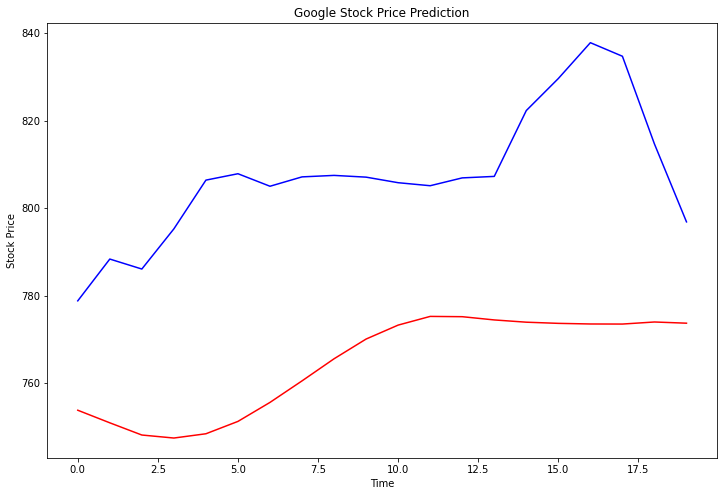

In [28]:
#Visualization 
plt.rcParams["figure.figsize"] = (12,8) 
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price') 
plt.plot(real_stock_price,color='blue',label='Real Stock Price') 
plt.title('Google Stock Price Prediction') 
plt.xlabel('Time') 
plt.ylabel('Stock Price') 
#plt.legend() 
plt.show()